<a href="https://colab.research.google.com/github/subhashraj3031/AlmaBetter_Project/blob/main/Capstone_Project_Exploratory_Data_Analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Type: Exploratory Data Analysis (EDA) – Classification**

Project Summary: Paisabazaar is a financial services company that assists customers in finding suitable credit and banking products. A critical component of this service is assessing the creditworthiness of individuals.

This project performs Exploratory Data Analysis (EDA) on customer credit data to understand financial behavior patterns and identify key factors influencing credit score categories (Poor, Standard, Good).
The insights derived from this analysis will help improve credit risk assessment, loan approval decisions, and personalized product recommendations.

**Problem Statement:**

The objective is to analyze customer financial and credit-related data and identify patterns that influence credit score classification.

**Business Objective:**

To understand the key drivers of credit scores and help Paisabazaar reduce default risk while improving decision-making.

In [8]:
## Importing Required Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)
plt.style.use('default')

**Loading Dataset**

In [24]:
## Loadning dataset
df =pd.read_csv("/content/dataset.csv")
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.94496,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good


** Basic Data Inspection**

In [11]:
df.shape

(100000, 28)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [13]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [16]:
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.94496,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good


In [15]:
df.tail(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,11.5,3.0,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,6.0,11.5,3.0,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [17]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [18]:
df.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000,100000.00000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,NaN,NaN,NaN,10128,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,6261,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,Jessicad,NaN,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,48,NaN,NaN,7096,NaN,NaN,NaN,NaN,NaN,NaN,11408,NaN,NaN,NaN,NaN,45848,NaN,NaN,NaN,52326,NaN,NaN,28616,NaN,53174
mean,80631.500000,25982.666640,4.500000,NaN,33.316340,5.004617e+08,NaN,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,NaN,21.08141,13.313120,10.470323,5.798250,NaN,1426.220376,32.285173,221.220460,NaN,107.699208,55.101315,NaN,392.697586,NaN
std,43301.486619,14340.543051,2.291299,NaN,10.764812,2.908267e+08,NaN,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,NaN,14.80456,6.237166,6.609481,3.867826,NaN,1155.129026,5.116875,99.680716,NaN,132.267056,39.006932,NaN,201.652719,NaN
min,5634.000000,1006.000000,1.000000,NaN,14.000000,8.134900e+04,NaN,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,NaN,0.00000,0.000000,0.500000,0.000000,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,43132.750000,13664.500000,2.750000,NaN,24.000000,2.451686e+08,NaN,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,NaN,10.00000,9.000000,5.380000,3.000000,NaN,566.072500,28.052567,144.000000,NaN,29.268886,27.959111,NaN,267.615983,NaN
50%,80631.500000,25777.000000,4.500000,NaN,33.000000,5.006886e+08,NaN,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,NaN,18.00000,14.000000,9.400000,5.000000,NaN,1166.155000,32.305784,219.000000,NaN,66.462304,45.156550,NaN,333.865366,NaN
75%,118130.250000,38385.000000,6.250000,NaN,42.000000,7.560027e+08,NaN,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,NaN,28.00000,18.000000,14.850000,8.000000,NaN,1945.962500,36.496663,302.000000,NaN,147.392573,71.295797,NaN,463.215683,NaN


**Understanding Columns**

Dataset Features

Demographic:

Age,
Occupation,
Annual_Income,
Monthly_Inhand_Salary,

**Credit Behaviour**

Num_Bank_Accounts,
Num_Credit_Card,
Outstanding_Debt,
Credit_Utilization_Ratio,
Credit_Mix

**Payment Behaviour**

Delay_from_due_date,
Num_of_Delayed_Payment,
Payment_of_Min_Amount,
Total_EMI_per_month,
Payment_Behaviour

**Target Variable**

Credit_Score (Good / Standard / Poor)

In [25]:
## Remove irrevant columns
df.drop(columns=['ID','Customer_ID',"Name",'SSN'], inplace=True)
print(df.columns)

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [26]:
## Missing Values
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


In [31]:
## Handling Missing Values

# Numerical - Median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

## Categoricals - Mode
cat_cols = df.select_dtypes(include = "object").columns
for col in cat_cols:
  df[col].fillna(df[col].mode()[0],inplace=True)

  ## Check Missing Values
  print(df.isnull().sum())


/tmp/ipython-input-2532811009.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                

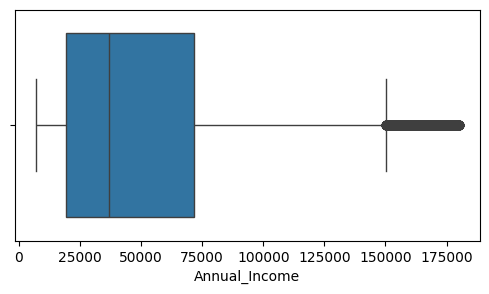

In [32]:
## out;ier detection

## Anual Income
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Annual_Income'])
plt.show()

In [35]:
## outlier Treatment (IQR)

Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Annual_Income'] >=Q1 -1.5*IQR) & (df['Annual_Income']<=Q3 + 1.5*IQR)]

print(df.shape)
print(IQR)

## High income outlier may represent premium customers


(97544, 24)
50407.82000000001


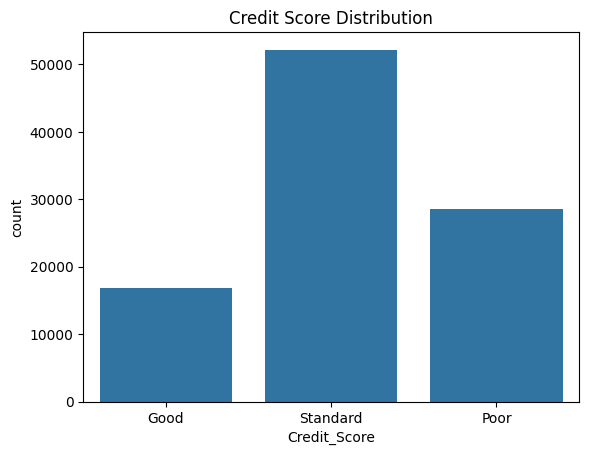

In [36]:
## Universal Analysis

sns.countplot(x='Credit_Score',data=df)
plt.title('Credit Score Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

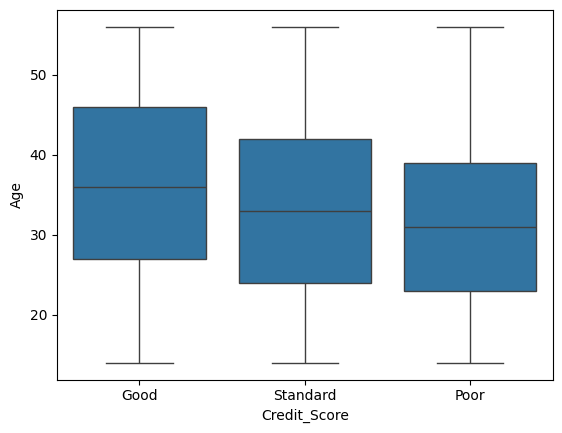

In [38]:
## Age Vs Credit Score

sns.boxplot(x='Credit_Score',y='Age',data=df)
plt.show

## Younger Customers tend to have lower Scores..

<function matplotlib.pyplot.show(close=None, block=None)>

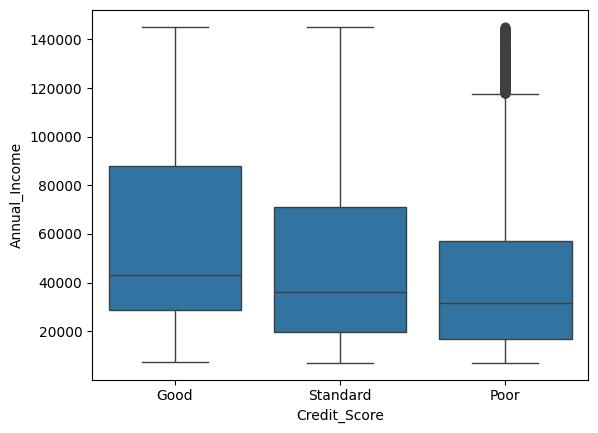

In [41]:
## Income VS Credit Score

sns.boxplot(x='Credit_Score',y='Annual_Income',data=df)
plt.show

## Income alone does note ensure good credit.



<function matplotlib.pyplot.show(close=None, block=None)>

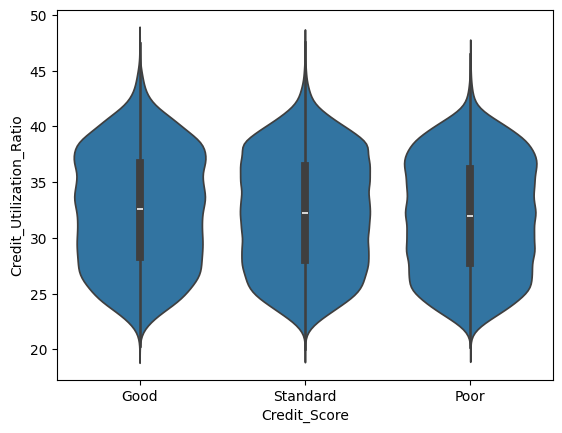

In [42]:
## Credit Utilization Analysis

sns.violinplot(x='Credit_Score',y='Credit_Utilization_Ratio',data=df)
plt.show

## High Utilization --> Poor Credit Score..


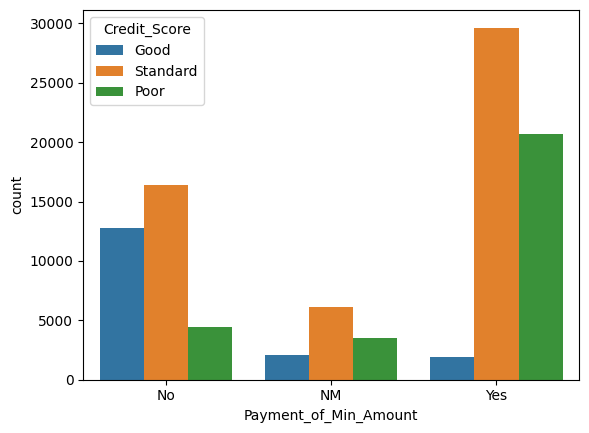

In [45]:
## Payment Behaviour Impact

sns.countplot(x='Payment_of_Min_Amount', hue= 'Credit_Score', data=df)

plt.show()

### Customer Skipping Small Payments are high risk..


In [47]:
### Interactive plot

fig = px.scatter(
    df,
    x='Annual_Income',
    y='Outstanding_Debt',
    color='Credit_Score',
    title='Annual Income vs Outstanding Debt'
)
fig.show()

**Key Insight**


*   Payment delays strongly affect credit score.
*   High credit utilization leads to poor score
*   Income alone is not a strong prediction
*   Payment discipline is the strongest Indicators


**Solution to Business Objective**

PaisaBajar Should Be:
*   Track Payment behavior Closely
*   Penelize high credit utilizations
*   Use early warning systems for delays payments
*   Offer customized products based on risk profile











**Conclusion**

EDA revealed that responsible credit behavior is more important than income level. This analysis provides a strong foundation for predictive credit scoring models.